# 1

$0 = \frac{\partial }{\partial \mu} \log p(x;u, \sigma^2) =  \frac{\partial }{\partial \mu}(- \frac{1}{2\sigma^2} \sum_1^N(x_i-u)^2) - \frac{\partial }{\partial \mu}(\frac{N}{2}\log\sigma^2)- \frac{\partial }{\partial \mu}(\frac{N}{2}\log2\pi)$

$0  = - \frac{1}{2\sigma^2} \left(\sum_1^N-2(x_i-u)\right) -0-0$

$0  = - \frac{-2}{2\sigma^2} \sum_1^N(x_i-Nu) $ ...... $\times\sigma^2 $     both side

$Nu = \sum_1^N x_i$

$u = \frac{1}{N}\sum_1^N x_i$

##

$0 = \frac{\partial }{\partial \sigma} \log p(x;u, \sigma^2) =  \frac{\partial }{\partial\sigma}(- \frac{1}{2\sigma^2} \sum_1^N(x_i-u)^2) - \frac{\partial }{\partial \sigma}(\frac{N}{2}\log\sigma^2)- \frac{\partial }{\partial \sigma}(\frac{N}{2}\log2\pi)$

$0 =  \frac{\partial }{\partial\sigma}(- \frac{1}{2} \sigma^{-2}\sum_1^N(x_i-u)^2) - \frac{\partial }{\partial \sigma}(\frac{N}{2}2\log\sigma)- 0$

$0 = (- \frac{1}{2} -2\sigma^{-3}\sum_1^N(x_i-u)^2) - (N\frac{1}{\sigma})- 0$

$0 = (\sigma^{-3}\sum_1^N(x_i-u)^2) - (N\frac{1}{\sigma})$ ...... $\times\sigma $ and $+N$ both side

$N = \sigma^{-2}\sum_1^N(x_i-u)^2 $ ...... $\times\sigma^2 $ and $\div N$ both side

$\sigma^{2} = \frac{1}{N}\sum_1^N(x_i-u)^2$

$\sigma = \sqrt{\frac{1}{N}\sum_1^N(x_i-u)^2}$



# 2.1

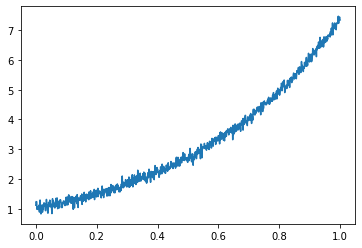

In [2]:
from scipy.io import loadmat
import matplotlib.pyplot as plt

data = loadmat('D:\DL\data.mat')

x, y = data['x'],data['y']
plt.plot(x,y)

# 2.2
## Gradient Decent
 Intialize the equation to $y = ax +b $ where a = 1, b = 0

loss function $=\frac{1}{n} \sum (y_i - (ax_i +b) )$

a, b = 5.98091716963753 0.20702719954941007
Loss =  0.20580596682517396


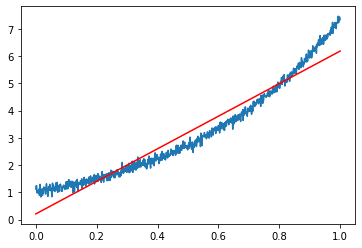

In [5]:
import numpy as np
x, y = data['x'],data['y']
plt.plot(x,y)
a = 1
b = 0
n = len(data['x'])
learning_rate = 0.3
epochs = 1000
#print(n)
for i in range(epochs):
    y_predicted = a*x + b
    d_a = (-2/n) * sum(x * (y - y_predicted)) # Derivative
    d_b = (-2/n) * sum(y - y_predicted) # Derivative

    a = a-learning_rate*d_a
    b = b-learning_rate*d_b
print('a, b =',a[0],b[0]) #a=5.98 b=0.2

y_predicted = a*x + b 
print('Loss = ',np.mean(pow(y_predicted-y,2)))
plt.plot(x,y_predicted,'r-')
plt.show()

## Psuedo Inverse

a, b =  5.980917169637538 0.20702719954940577
Loss =  0.20580596682517407


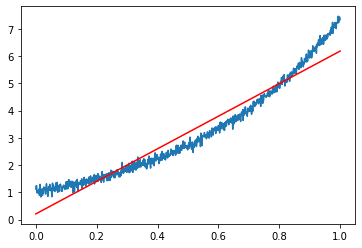

In [6]:
import numpy as np
x, y = data['x'],data['y']
plt.plot(x,y)
y_predict = np.array(y)
A = np.concatenate((np.ones((1001,1)),np.array(x)),axis=1)

b, a = (np.dot(np.dot(np.linalg.inv(np.dot(A.T,A)),A.T),y_predict)).tolist()

y_predicted= b[0] + a[0]*x 
print('a, b = ', a[0],b[0])
print('Loss = ',np.mean(pow(y_predicted-y,2)))
plt.plot(x,y_predicted,'r-')
plt.show()

# 3.
## Psuedo Inverse

__The Quadratic Equation is more suitable for this dataset.__

__Because Quadratic form has lower loss.__

$ y_{pred}= c+bx+ax^2$

$ \theta = (A^T A)^{-1} A^T y , $

where $\theta=[c,b,a] $

$ A = 
\begin{bmatrix}
    1      & x_1 & x_1^2 \\
    1       & x_2 & x_2^2 \\
    \vdots & \vdots & \vdots \\
    1       & x_{1001} & x_{1001}^2
\end{bmatrix}
$

a, b, c =  5.837350079181343 0.14356709045614083 1.1789459877331172
Loss =  0.015744919931207565


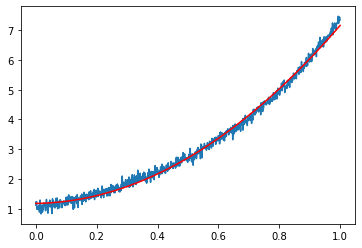

In [7]:
import numpy as np
x, y = data['x'],data['y']
plt.plot(x,y)
y_predict = np.array(y)
#print (y_predict)
A = np.concatenate((np.ones((1001,1)),np.array(x),np.array(pow(x,2))),axis=1)

c, b, a = (np.dot(np.dot(np.linalg.inv(np.dot(A.T,A)),A.T),y_predict)).tolist()

y_predicted= c[0] + b[0]*x + a[0]*x*x
print('a, b, c = ',a[0], b[0], c[0])
print('Loss = ',np.mean(pow(y_predicted-y,2)))
plt.plot(x,y_predicted,'r-')
plt.show()

a, b, c = 5.746239695873643 0.2380015284105624 1.1620685451366861
(1,)
Loss =  0.015792146372415744


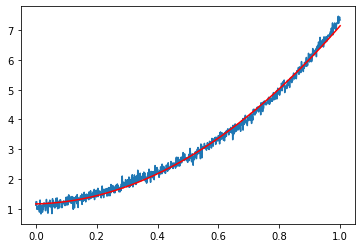

In [9]:
x, y = data['x'],data['y']
plt.plot(x,y)
a = 1
b = 0
c = 0
n = len(data['x'])
learning_rate = 0.3
epochs = 2000
#print(n)
for i in range(epochs):
    y_predicted = a*x*x + b*x + c
    d_b = (-2/n) * sum(x * (y - y_predicted)) # Derivative
    d_c = (-2/n) * sum(y - y_predicted) # Derivative
    d_a = (-2/n) * sum(x *x *(y - y_predicted)) # Derivative

    a = a-learning_rate*d_a
    b = b-learning_rate*d_b
    c = c-learning_rate*d_c
print('a, b, c =',a[0],b[0],c[0]) #a=5.98 b=0.2
print(a.shape)

y_predicted = a*x*x + b*x + c 
print('Loss = ',np.mean(pow(y_predicted-y,2)))
plt.plot(x,y_predicted,'r-')
plt.show()

# 4

In [35]:
from __future__ import print_function
import keras
from keras.datasets import mnist

# input image dimensions 28x28
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


# 4.1

4.1.	(5%) Please draw 1,000 different handwritten images from either the training or the testing dataset to form your own dataset, where each digit has 100 data samples.

In [36]:

dict = {}
for n in range(x_test.shape[0]):
    
    if y_test[n] in dict:
        if dict[y_test[n]].shape[0] > 99:
            continue
        dict[y_test[n]] = np.concatenate((dict[y_test[n]],x_test[n][np.newaxis,:]),0)
        
    else:

        dict[y_test[n]] = x_test[n][np.newaxis,:]
        


all_image = dict[0]
for n in range(1,10):
    all_image = np.concatenate((all_image,dict[n]),0) #(2800, 280)


# 4.2

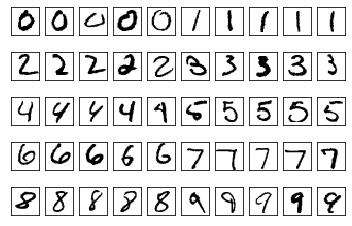

(1000, 28, 28)

In [92]:

##############################################

import numpy as np
import matplotlib.pyplot as plt
def showimg(x_test):
    amount= 50
    lines = 5
    columns = 10
    number = np.zeros(amount)

    for i in range(amount):
        number[i] = y_test[i]
        # print(number[0])

    fig = plt.figure()

    for i in range(amount):
        ax = fig.add_subplot(lines, columns, 1 + i)
        plt.imshow(x_test[i,:,:], cmap='binary')
        plt.sca(ax)
        ax.set_xticks([], [])
        ax.set_yticks([], [])

    plt.show()
##############################################
showimg(all_image[::20])
all_image.shape

# 4.3 4.4 4.5

As reducing the dimensions,images become more and more blur due to lossing the features.

當維度越來越小 , 利用PCA產生的新資料可能會失去一些原本能表現的特徵，雖然可以減少維度、減輕計算，但如果PCA後的維度如果不足以表現原本應該有的特徵，那使用PCA就沒有意義。就500 , 300 , 100 , 50來說，維度越多的手寫圖越看得出數字，但如果再低於50維，有些數字就已經難以分辨了。

(784, 1)
reduce to 784 dimesions


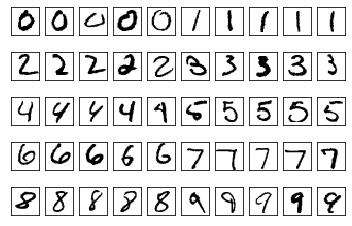

(784, 1)
reduce to 500 dimesions


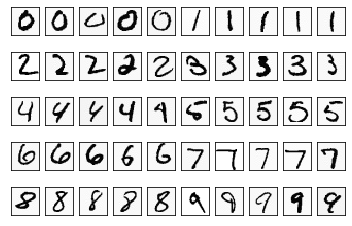

(784, 1)
reduce to 300 dimesions


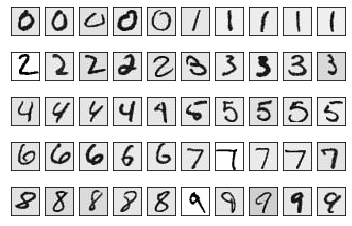

(784, 1)
reduce to 100 dimesions


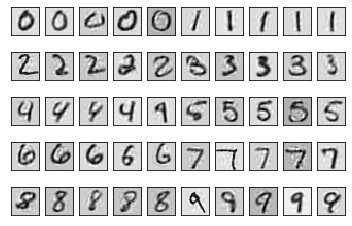

(784, 1)
reduce to 50 dimesions


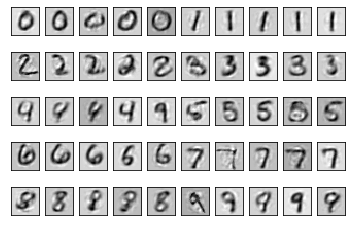

In [117]:
dimensions = [784, 500, 300, 100, 50]
for d in dimensions:
    flat_x = all_image.reshape(1000,784).T
    flat_x_mean = np.mean(flat_x, axis=1,keepdims=True)
    print(flat_x_mean.shape)
    flat_x_std = np.std(flat_x, axis=1,keepdims=True,ddof=1)
    flat_x_std[flat_x_std == 0] = 1e-10
    flat_x_normalized = ((flat_x - flat_x_mean)/flat_x_std).T ###############4.3
    
    x_covariance = np.dot(flat_x_normalized.T,flat_x_normalized) ###############4.4

    eig_value, eig_vector = np.linalg.eig(x_covariance)

    eigen_index = np.argsort(-eig_value)
    eigen_index = eigen_index[:d:]
    eig_vector = eig_vector[:,eigen_index]

    xvector = np.dot(flat_x_normalized , eig_vector) ###############4.5

    ##

    img_pca = np.dot(xvector , eig_vector.T)
    
    img_pca = img_pca*flat_x_std.T + flat_x_mean.T
    img_pca = img_pca.reshape(1000,28,28)


    print(f'reduce to {d} dimesions')
    showimg(np.float32(img_pca).reshape(1000,28,28)[::20])